# Introduction to Artificial Neural Networks

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Perceptrons

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

[0, 5, 0, 2]

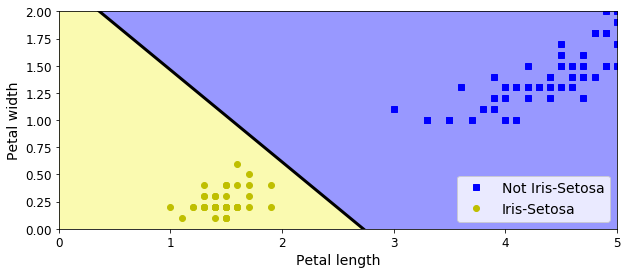

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

# Activation functions

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

[-5, 5, -0.2, 1.2]

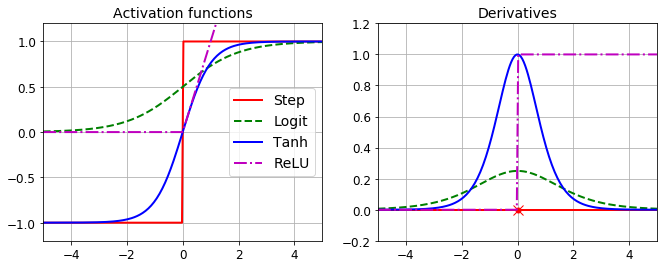

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

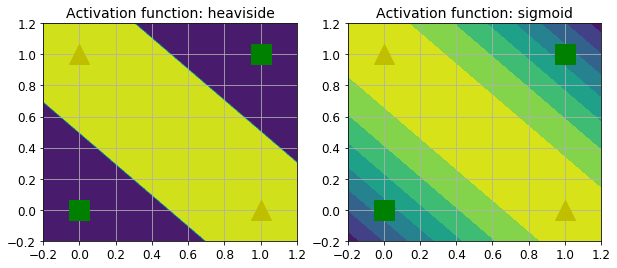

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## Using the Estimator API (formerly `tf.contrib.learn`)

In [9]:
import tensorflow as tf

/Users/uconn/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**Warning**: `tf.examples.tutorials.mnist` is deprecated. We will use `tf.keras.datasets.mnist` instead. Moreover, the `tf.contrib.learn` API was promoted to `tf.estimators` and `tf.feature_columns`, and it has changed considerably. In particular, there is no `infer_real_valued_columns_from_input()` function or `SKCompat` class.

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [12]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/nt/dbnbq_310w56v1k7t_l9hmf00000gp/T/tmp0m4ir3dp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a242a57f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/nt

INFO:tensorflow:global_step/sec: 184.793
INFO:tensorflow:loss = 0.6401104, step = 7201 (0.541 sec)
INFO:tensorflow:global_step/sec: 200.662
INFO:tensorflow:loss = 0.73171985, step = 7301 (0.498 sec)
INFO:tensorflow:global_step/sec: 194.099
INFO:tensorflow:loss = 0.8660872, step = 7401 (0.516 sec)
INFO:tensorflow:global_step/sec: 188.109
INFO:tensorflow:loss = 0.6044004, step = 7501 (0.531 sec)
INFO:tensorflow:global_step/sec: 206.729
INFO:tensorflow:loss = 0.22512665, step = 7601 (0.484 sec)
INFO:tensorflow:global_step/sec: 192.705
INFO:tensorflow:loss = 0.13840184, step = 7701 (0.519 sec)
INFO:tensorflow:global_step/sec: 197.094
INFO:tensorflow:loss = 0.14915296, step = 7801 (0.509 sec)
INFO:tensorflow:global_step/sec: 218.534
INFO:tensorflow:loss = 1.7051003, step = 7901 (0.456 sec)
INFO:tensorflow:global_step/sec: 294.158
INFO:tensorflow:loss = 0.10754973, step = 8001 (0.340 sec)
INFO:tensorflow:global_step/sec: 162.818
INFO:tensorflow:loss = 1.0085683, step = 8101 (0.614 sec)
INFO:

INFO:tensorflow:global_step/sec: 295.837
INFO:tensorflow:loss = 0.12424447, step = 15401 (0.342 sec)
INFO:tensorflow:global_step/sec: 301.03
INFO:tensorflow:loss = 0.25178686, step = 15501 (0.328 sec)
INFO:tensorflow:global_step/sec: 193.169
INFO:tensorflow:loss = 0.6330232, step = 15601 (0.518 sec)
INFO:tensorflow:global_step/sec: 273.382
INFO:tensorflow:loss = 4.4677095, step = 15701 (0.366 sec)
INFO:tensorflow:global_step/sec: 249.749
INFO:tensorflow:loss = 0.2334754, step = 15801 (0.401 sec)
INFO:tensorflow:global_step/sec: 289.209
INFO:tensorflow:loss = 0.011980635, step = 15901 (0.345 sec)
INFO:tensorflow:global_step/sec: 220.485
INFO:tensorflow:loss = 0.03585716, step = 16001 (0.453 sec)
INFO:tensorflow:global_step/sec: 315.631
INFO:tensorflow:loss = 0.29706758, step = 16101 (0.317 sec)
INFO:tensorflow:global_step/sec: 302.503
INFO:tensorflow:loss = 0.17081738, step = 16201 (0.331 sec)
INFO:tensorflow:global_step/sec: 308.286
INFO:tensorflow:loss = 0.14440763, step = 16301 (0.32

INFO:tensorflow:loss = 0.005666947, step = 23501 (0.423 sec)
INFO:tensorflow:global_step/sec: 260.358
INFO:tensorflow:loss = 0.07897126, step = 23601 (0.384 sec)
INFO:tensorflow:global_step/sec: 268.536
INFO:tensorflow:loss = 0.061580617, step = 23701 (0.372 sec)
INFO:tensorflow:global_step/sec: 253.579
INFO:tensorflow:loss = 0.042100776, step = 23801 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.291
INFO:tensorflow:loss = 0.040096883, step = 23901 (0.392 sec)
INFO:tensorflow:global_step/sec: 262.953
INFO:tensorflow:loss = 0.015538307, step = 24001 (0.380 sec)
INFO:tensorflow:global_step/sec: 259.64
INFO:tensorflow:loss = 0.046271294, step = 24101 (0.385 sec)
INFO:tensorflow:global_step/sec: 256.157
INFO:tensorflow:loss = 0.054752517, step = 24201 (0.390 sec)
INFO:tensorflow:global_step/sec: 251.785
INFO:tensorflow:loss = 0.3075313, step = 24301 (0.397 sec)
INFO:tensorflow:global_step/sec: 259.216
INFO:tensorflow:loss = 0.010415163, step = 24401 (0.386 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.09364507, step = 31601 (0.357 sec)
INFO:tensorflow:global_step/sec: 312.197
INFO:tensorflow:loss = 0.05567812, step = 31701 (0.321 sec)
INFO:tensorflow:global_step/sec: 300.303
INFO:tensorflow:loss = 0.019693846, step = 31801 (0.333 sec)
INFO:tensorflow:global_step/sec: 296.849
INFO:tensorflow:loss = 0.050345097, step = 31901 (0.337 sec)
INFO:tensorflow:global_step/sec: 307.529
INFO:tensorflow:loss = 0.084638365, step = 32001 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.52
INFO:tensorflow:loss = 0.07345063, step = 32101 (0.329 sec)
INFO:tensorflow:global_step/sec: 278.441
INFO:tensorflow:loss = 0.0038796142, step = 32201 (0.359 sec)
INFO:tensorflow:global_step/sec: 290.817
INFO:tensorflow:loss = 0.056467343, step = 32301 (0.344 sec)
INFO:tensorflow:global_step/sec: 293.953
INFO:tensorflow:loss = 0.035046015, step = 32401 (0.340 sec)
INFO:tensorflow:global_step/sec: 299.026
INFO:tensorflow:loss = 0.17177227, step = 32501 (0.335 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.041306105, step = 39701 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.062
INFO:tensorflow:loss = 0.016019424, step = 39801 (0.328 sec)
INFO:tensorflow:global_step/sec: 296.238
INFO:tensorflow:loss = 0.014265168, step = 39901 (0.339 sec)
INFO:tensorflow:global_step/sec: 294.911
INFO:tensorflow:loss = 0.035579637, step = 40001 (0.338 sec)
INFO:tensorflow:global_step/sec: 309.036
INFO:tensorflow:loss = 0.027056376, step = 40101 (0.324 sec)
INFO:tensorflow:global_step/sec: 288.671
INFO:tensorflow:loss = 0.0530001, step = 40201 (0.347 sec)
INFO:tensorflow:global_step/sec: 329.283
INFO:tensorflow:loss = 0.0074716373, step = 40301 (0.303 sec)
INFO:tensorflow:global_step/sec: 297.117
INFO:tensorflow:loss = 0.037592918, step = 40401 (0.337 sec)
INFO:tensorflow:global_step/sec: 296.245
INFO:tensorflow:loss = 0.017032254, step = 40501 (0.338 sec)
INFO:tensorflow:global_step/sec: 323.506
INFO:tensorflow:loss = 0.02274588, step = 40601 (0.309 sec)
INFO:tensorflow:global_

In [13]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-23-01:19:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nt/dbnbq_310w56v1k7t_l9hmf00000gp/T/tmp0m4ir3dp/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-23-01:19:40
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.979, average_loss = 0.10624744, global_step = 44000, loss = 13.449042


In [14]:
eval_results

{'accuracy': 0.979,
 'average_loss': 0.10624744,
 'global_step': 44000,
 'loss': 13.449042}

In [15]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nt/dbnbq_310w56v1k7t_l9hmf00000gp/T/tmp0m4ir3dp/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'logits': array([-2.5110343e+00, -7.2146187e+00,  1.8354915e-02,  5.1616344e+00,
        -5.9140916e+00, -9.2714739e+00, -2.1584358e+01,  2.5221336e+01,
        -5.6035929e+00,  5.0505967e+00], dtype=float32),
 'probabilities': array([9.0361740e-13, 8.1892416e-15, 1.1336631e-11, 1.9417001e-09,
        3.0064615e-14, 1.0470400e-15, 4.7048430e-21, 1.0000000e+00,
        4.1011319e-14, 1.7376363e-09], dtype=float32)}

## Using plain TensorFlow

In [16]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [17]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [18]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [19]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [20]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [21]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [22]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [23]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [24]:
n_epochs = 40
batch_size = 50

In [25]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [26]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9146
1 Batch accuracy: 0.92 Val accuracy: 0.936
2 Batch accuracy: 0.96 Val accuracy: 0.945
3 Batch accuracy: 0.92 Val accuracy: 0.9508
4 Batch accuracy: 0.98 Val accuracy: 0.956
5 Batch accuracy: 0.96 Val accuracy: 0.9566
6 Batch accuracy: 1.0 Val accuracy: 0.9614
7 Batch accuracy: 0.96 Val accuracy: 0.9632
8 Batch accuracy: 0.98 Val accuracy: 0.9652
9 Batch accuracy: 0.96 Val accuracy: 0.9658
10 Batch accuracy: 0.92 Val accuracy: 0.9688
11 Batch accuracy: 0.98 Val accuracy: 0.9684
12 Batch accuracy: 0.98 Val accuracy: 0.9676
13 Batch accuracy: 0.98 Val accuracy: 0.9712
14 Batch accuracy: 1.0 Val accuracy: 0.9714
15 Batch accuracy: 0.94 Val accuracy: 0.9732
16 Batch accuracy: 1.0 Val accuracy: 0.9736
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9746
19 Batch accuracy: 0.98 Val accuracy: 0.9746
20 Batch accuracy: 1.0 Val accuracy: 0.976
21 Batch accuracy: 1.0 Val accuracy: 0.9756
22 Batch accuracy: 0.98 Val accu

In [27]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [28]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [29]:
from tensorflow_graph_in_jupyter import show_graph

In [30]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: previous releases of the book used `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [31]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [32]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [33]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [34]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [35]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [36]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [37]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [38]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9656
11 Batch accuracy: 0.98 Validation accuracy: 0.9666
12 Batch accuracy: 0.98 Validation accuracy: 0.9684
13 Batch accuracy: 0.98 Validation accuracy: 0.9704
14 Batch accuracy: 1.0 Validation accuracy: 0.9694
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9726
17 Batch accuracy: 1.0 Validation accuracy: 0.9728
18 Batch accuracy: 0.98 Validation accuracy: 0.9744
19 Batch accuracy: 0.98 Vali

In [39]:
show_graph(tf.get_default_graph())